Step 1: Läs in datan och spara i lämplig datastruktur

Step 2: Plotta alla punkterna (Varje klass får en färg) i samma fönster

Steg 3: Läs in testpunkter.

Steg 4: Beräkna avstånd mellan testpunkt och träningspunkter

Steg 5: Kolla närmsta punkten och se ifall den är Pichu

OM JA Klassificera testpunkt som Pichu. OM NEJ Klassifcera testpunk som Pikachu

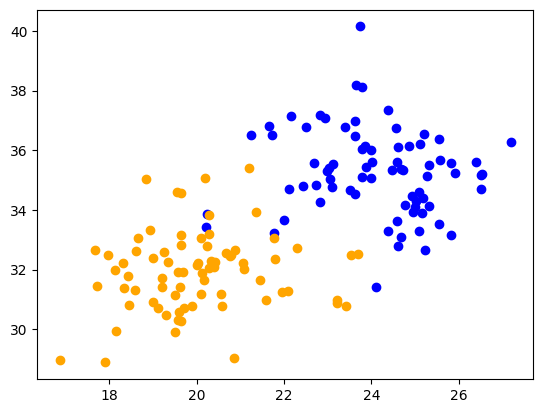

([20.5, 34], [0, [0.2707605811313157, 0.8407637696691934, 0.851831021898391, 1.0151129754784294, 1.0274319382465231, 1.1133281192301259, 1.124575148410337, 1.202331622739514, 1.2383861848494575, 1.4104415650150028, 1.444878347721123, 1.4480192388791888, 1.535574593175068, 1.5600206852540037, 1.5640567739825006, 1.574438926437964, 1.7067995982298647, 1.713390784506707, 1.738255491707451, 1.8431716894671715, 1.8695108150249657, 1.8884984356948464, 1.9112809460273177, 1.9153029485760777, 1.955650358582758, 1.9583386884336649, 2.05329766841169, 2.0734262480472276, 2.100952341857356, 2.1015232135019137, 2.1430307889856643, 2.2032789055790927, 2.2083206061216387, 2.221898070059663, 2.2623008187478555, 2.355758549827558, 2.3854874423691874, 2.528514082090588, 2.6231580670549377, 2.716068186727245, 2.809658220446095, 2.8232473359350836, 2.8361705833041593, 2.8842478405221668, 2.9500324421949697, 3.024993402488167, 3.0304924806554383, 3.106822397079694, 3.1224659141859332, 3.1232901973285374, 3

In [10]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import math
#Reads in the datapoints & testpoints
file = open("datapoints.csv", "r")
data = list(csv.reader(file, delimiter=","))
file.close()

file = open("testpoints.csv", "r") #steg 3
testpoints = list(csv.reader(file, delimiter=","))
file.close()

pikachu = []
pichu = []
datastorage = []

#print(testpoints)
#print(data)

#Data sorter/separator fixes the " 0" and " 1" from import of csv file
for i in data:
  if i[2] in " 0":
    i[2] = 0
    pichu.append(i)
  elif i[2] in " 1":
    i[2] = 1
    pikachu.append(i)
#Did it like this instead since csv was badly structured
#Would have some code if there were more testpoints
testpoints = [[25,32],[24.2,31.5],[22,34],[20.5,34]]


def scatterer(pokelist):
  for poke in pokelist:
    x = float(poke[0])
    y = float(poke[1])
    if poke[2] == 1:
      plt.scatter(x,y, color = 'blue')
    elif poke[2] == 0:
      plt.scatter(x,y, color = 'orange')

scatterer(pikachu)
scatterer(pichu)

plt.show() #Steg 2 Klart

#Calculate distance steg 4
distance_list = []
tp_list = []

def distance_calc(testp, compare_list):
  
  for tp in testp: # testar alla test_punkter
    distance_list = []
    x1 = float(tp[0])
    y1 = float(tp[1])
    for dp in compare_list: # beräknar avståndet emellan testpunkt och datapunkt
      x2 = float(dp[0])
      y2 = float(dp[1])
      distance = math.sqrt((x2-x1)**2+(y2-y1)**2)
      distance_list.append(distance)
    #After each lap
    distance_list.sort()
    testing = tp, [dp[2],distance_list] 
    tp_list.append(testing)
    
  # List append here?
  
  

distance_calc(testpoints, pikachu)
distance_calc(testpoints, pichu)
# 0 = Pichu, 1 = Pikachu
counter = range(len(tp_list))
tp_list.sort()
for num in counter:
  print(tp_list[num])





Pikachu = 1 and Pichu = 0 with 1 test point

20.5, 34 Chu = 0.27 Pik = 0.28 win: Chu

22, 34   Chu = 0.65 Pik = 0.35 win: Pik

24.2, 31.5 Chu = 1.05 Pik = 0.12 win: Pik

25, 32 Chu = 1.4 Pik = 0.68 win: Pik

In [92]:
#How to go thru the lists and find the right thingy
def compare_distance(list, x):
  # 0 in list[x][1][0] = pichu 1 in list[x][1][0] = pikachu
  x = x * 2
  y = x + 1
  print(f"Comparing {list[x][1][0]} Pichu and {list[y][1][0]} Pikachu for point {list[x][0]}")
  print(f"Distance from point = {list[x][1][1][0]} for {list[x][1][0]} Pichu")
  print(f"Distance from point = {list[y][1][1][0]} for {list[y][1][0]} Pikachu")
  if list[y][1][1][0] > list[x][1][1][0]:
    print(f"{round(list[y][1][1][0],4)} Pikachu distance is greater than {round(list[x][1][1][0],4)} Pichu distance")
    print(f"So that means point {list[x][0]} is Pichu")
    result = ["Pichu",list[x][0]]
    print(result)
    finished_test.append(result)
  elif list[y][1][1][0] < list[x][1][1][0]:
    print(f"{round(list[y][1][1][0],4)} Pikachu distance is less than {round(list[x][1][1][0],4)} Pichu distance")
    print(f"So that means point {list[x][0]} is Pikachu")
    result = ["Pikachu",list[x][0]]
    print(result)
    finished_test.append(result)
  print(f"-----------")


iterations = int(len(tp_list) / 2)
finished_test = []
for num in range(iterations):
  compare_distance(tp_list,num)

print(finished_test)

Comparing 0 Pichu and 1 Pikachu for point [20.5, 34]
Distance from point = 0.2707605811313157 for 0 Pichu
Distance from point = 0.28744341743036106 for 1 Pikachu
0.2874 Pikachu distance is greater than 0.2708 Pichu distance
So that means point [20.5, 34] is Pichu
['Pichu', [20.5, 34]]
-----------
Comparing 0 Pichu and 1 Pikachu for point [22, 34]
Distance from point = 0.6519647482541766 for 0 Pichu
Distance from point = 0.3542396645807627 for 1 Pikachu
0.3542 Pikachu distance is less than 0.652 Pichu distance
So that means point [22, 34] is Pikachu
['Pikachu', [22, 34]]
-----------
Comparing 0 Pichu and 1 Pikachu for point [24.2, 31.5]
Distance from point = 1.0582437258984485 for 0 Pichu
Distance from point = 0.12078857390630211 for 1 Pikachu
0.1208 Pikachu distance is less than 1.0582 Pichu distance
So that means point [24.2, 31.5] is Pikachu
['Pikachu', [24.2, 31.5]]
-----------
Comparing 0 Pichu and 1 Pikachu for point [25, 32]
Distance from point = 1.405938571427235 for 0 Pichu
Dis